# Handle multidimensional morphological data

In [1]:
%load_ext autoreload
%autoreload 2

import yaml


In [2]:
# parse config file
with open('../config.yml', 'r') as f:
    cfg = yaml.safe_load(f)

input = cfg['input']
output = cfg['output']

In [4]:
from morphelia.tools import MorphData
from morphelia.preprocessing import pseudostitch
from morphelia.time_series import trace
from morphelia.time_series import temporal_reduction

In [48]:
adata = MorphData()

adata = adata.from_csv(exp=input, files=["Cells.txt"], obj_delimiter="\t",
                        treat_file="Treatment.csv").to_anndata()

adata

Reading Morphome Data from CSV...


C:\Users\amarx\Anaconda3\envs\morphelia_env\lib\site-packages\anndata\_core\anndata.py:120: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


AnnData object with n_obs × n_vars = 38305 × 407
    obs: 'BatchNumber', 'PlateNumber', 'ImageNumber', 'ObjectNumber', 'Metadata_Col', 'Metadata_Field', 'Metadata_FileLocation', 'Metadata_Frame', 'Metadata_Row', 'Metadata_Series', 'Metadata_Well', 'Cells_AreaShape_BoundingBoxArea', 'Cells_AreaShape_BoundingBoxMaximum_X', 'Cells_AreaShape_BoundingBoxMaximum_Y', 'Cells_AreaShape_BoundingBoxMinimum_X', 'Cells_AreaShape_BoundingBoxMinimum_Y', 'Cells_AreaShape_Center_X', 'Cells_AreaShape_Center_Y', 'Cells_AreaShape_EulerNumber', 'Cells_Location_CenterMassIntensity_X_CalceinAM', 'Cells_Location_CenterMassIntensity_Y_CalceinAM', 'Cells_Location_CenterMassIntensity_Z_CalceinAM', 'Cells_Location_Center_X', 'Cells_Location_Center_Y', 'Cells_Location_Center_Z', 'Cells_Location_MaxIntensity_X_CalceinAM', 'Cells_Location_MaxIntensity_Y_CalceinAM', 'Cells_Location_MaxIntensity_Z_CalceinAM', 'Cells_Neighbors_FirstClosestObjectNumber_20', 'Cells_Neighbors_FirstClosestObjectNumber_Adjacent', 'Cells_Nei

In [49]:
from morphelia.preprocessing import drop_nan, drop_duplicates, drop_invariant

adata = drop_nan(adata, verbose=True)
adata = drop_duplicates(adata, verbose=True)
adata = drop_invariant(adata, verbose=True)

Dropped 3 features with missing values: ['Cells_AreaShape_NormalizedMoment_0_0', 'Cells_AreaShape_NormalizedMoment_0_1', 'Cells_AreaShape_NormalizedMoment_1_0']
Dropped 36 duplicated features: Index(['Cells_AreaShape_CentralMoment_0_0',
       'Cells_AreaShape_InertiaTensor_1_0',
       'Cells_AreaShape_SpatialMoment_0_0', 'Cells_Granularity_10_CalceinAM.1',
       'Cells_Granularity_11_CalceinAM.1', 'Cells_Granularity_12_CalceinAM.1',
       'Cells_Granularity_13_CalceinAM.1', 'Cells_Granularity_14_CalceinAM.1',
       'Cells_Granularity_15_CalceinAM.1', 'Cells_Granularity_16_CalceinAM.1',
       'Cells_Granularity_17_CalceinAM.1', 'Cells_Granularity_18_CalceinAM.1',
       'Cells_Granularity_19_CalceinAM.1', 'Cells_Granularity_1_CalceinAM.1',
       'Cells_Granularity_20_CalceinAM.1', 'Cells_Granularity_21_CalceinAM.1',
       'Cells_Granularity_22_CalceinAM.1', 'Cells_Granularity_23_CalceinAM.1',
       'Cells_Granularity_24_CalceinAM.1', 'Cells_Granularity_25_CalceinAM.1',
       '

In [50]:
from morphelia.features import drop_low_variance

adata = drop_low_variance(adata, verbose=True)


Iterating of features: 100%|██████████| 367/367 [00:01<00:00, 302.12it/s]

Drop 128 features with low variance: ['Cells_Texture_DifferenceVariance_CalceinAM_20_03_256', 'Cells_Texture_AngularSecondMoment_CalceinAM_20_01_256', 'Cells_Texture_SumVariance_CalceinAM_20_03_256', 'Cells_Texture_SumAverage_CalceinAM_20_01_256', 'Cells_Texture_Correlation_CalceinAM_20_01_256', 'Cells_Texture_SumEntropy_CalceinAM_20_03_256', 'Cells_Texture_DifferenceVariance_CalceinAM_10_02_256', 'Cells_Granularity_13_CalceinAM', 'Cells_Texture_DifferenceVariance_CalceinAM_10_03_256', 'Cells_RadialDistribution_ZernikePhase_CalceinAM_6_0', 'Cells_Texture_InverseDifferenceMoment_CalceinAM_10_01_256', 'Cells_Texture_SumAverage_CalceinAM_10_00_256', 'Cells_Texture_InverseDifferenceMoment_CalceinAM_20_00_256', 'Cells_Texture_SumVariance_CalceinAM_10_02_256', 'Cells_Texture_AngularSecondMoment_CalceinAM_10_00_256', 'Cells_Texture_Entropy_CalceinAM_10_03_256', 'Cells_Texture_Correlation_CalceinAM_10_03_256', 'Cells_Granularity_7_CalceinAM', 'Cells_Granularity_14_CalceinAM', 'Cells_Granularit

In [51]:
from morphelia.features import remove_noise

adata = remove_noise(adata, verbose=True)

Drop 101 noisy features: Index(['Cells_AreaShape_CentralMoment_1_3',
       'Cells_AreaShape_CentralMoment_1_2',
       'Cells_AreaShape_CentralMoment_2_1',
       'Cells_AreaShape_CentralMoment_1_1',
       'Cells_RadialDistribution_ZernikePhase_CalceinAM_8_4',
       'Cells_RadialDistribution_ZernikePhase_CalceinAM_1_1',
       'Cells_RadialDistribution_ZernikePhase_CalceinAM_2_2',
       'Cells_RadialDistribution_ZernikePhase_CalceinAM_8_2',
       'Cells_RadialDistribution_ZernikePhase_CalceinAM_5_5',
       'Cells_RadialDistribution_ZernikePhase_CalceinAM_8_8',
       ...
       'Cells_AreaShape_CentralMoment_0_3',
       'Cells_AreaShape_SpatialMoment_0_2',
       'Cells_AreaShape_SpatialMoment_2_1',
       'Cells_AreaShape_SpatialMoment_1_2',
       'Cells_AreaShape_CentralMoment_2_2',
       'Cells_AreaShape_CentralMoment_2_3',
       'Cells_AreaShape_SpatialMoment_0_3',
       'Cells_AreaShape_SpatialMoment_2_2',
       'Cells_AreaShape_SpatialMoment_1_3',
       'Cells_AreaSh

In [52]:
from morphelia.preprocessing import normalize

adata = normalize(adata, method='standard')

In [53]:
from morphelia.features import drop_highly_correlated

adata = drop_highly_correlated(adata, verbose=True, show=False)

Dropped 20 features: Index(['Cells_Texture_InfoMeas2_CalceinAM_3_03_256',
       'Cells_Texture_InfoMeas2_CalceinAM_3_01_256',
       'Cells_Texture_InfoMeas2_CalceinAM_3_02_256',
       'Cells_Texture_InfoMeas2_CalceinAM_10_01_256',
       'Cells_AreaShape_HuMoment_4', 'Cells_AreaShape_HuMoment_5',
       'Cells_AreaShape_HuMoment_3',
       'Cells_Texture_DifferenceVariance_CalceinAM_3_00_256',
       'Cells_Texture_DifferenceVariance_CalceinAM_3_01_256',
       'Cells_Texture_DifferenceVariance_CalceinAM_3_02_256',
       'Cells_AreaShape_HuMoment_2',
       'Cells_Texture_AngularSecondMoment_CalceinAM_3_00_256',
       'Cells_Texture_AngularSecondMoment_CalceinAM_3_01_256',
       'Cells_Texture_AngularSecondMoment_CalceinAM_3_02_256',
       'Cells_Intensity_MinIntensityEdge_CalceinAM',
       'Cells_Intensity_MaxIntensityEdge_CalceinAM',
       'Cells_Intensity_MeanIntensity_CalceinAM',
       'Cells_Intensity_MedianIntensity_CalceinAM',
       'Cells_RadialDistribution_FracAtD_C

In [54]:
adata = trace(adata)

Trying to set attribute `.obs` of view, copying.


In [55]:
from morphelia.plotting import show_trace

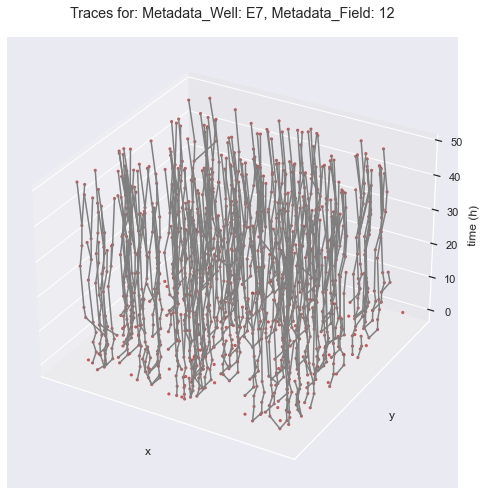

In [56]:
show_trace(adata, dim='3d', fields={"Metadata_Well": ["E7"], "Metadata_Field": [12]})#,
           # size="Cells_AreaShape_Area",
           # color="Cells_Intensity_MaxIntensity_CalceinAM")

In [57]:
adata

AnnData object with n_obs × n_vars = 38305 × 118
    obs: 'BatchNumber', 'PlateNumber', 'ImageNumber', 'ObjectNumber', 'Metadata_Col', 'Metadata_Field', 'Metadata_FileLocation', 'Metadata_Frame', 'Metadata_Row', 'Metadata_Series', 'Metadata_Well', 'Cells_AreaShape_BoundingBoxArea', 'Cells_AreaShape_BoundingBoxMaximum_X', 'Cells_AreaShape_BoundingBoxMaximum_Y', 'Cells_AreaShape_BoundingBoxMinimum_X', 'Cells_AreaShape_BoundingBoxMinimum_Y', 'Cells_AreaShape_Center_X', 'Cells_AreaShape_Center_Y', 'Cells_AreaShape_EulerNumber', 'Cells_Location_CenterMassIntensity_X_CalceinAM', 'Cells_Location_CenterMassIntensity_Y_CalceinAM', 'Cells_Location_CenterMassIntensity_Z_CalceinAM', 'Cells_Location_Center_X', 'Cells_Location_Center_Y', 'Cells_Location_Center_Z', 'Cells_Location_MaxIntensity_X_CalceinAM', 'Cells_Location_MaxIntensity_Y_CalceinAM', 'Cells_Location_MaxIntensity_Z_CalceinAM', 'Cells_Neighbors_FirstClosestObjectNumber_20', 'Cells_Neighbors_FirstClosestObjectNumber_Adjacent', 'Cells_Nei

In [58]:

tr = temporal_reduction(adata)

In [59]:
import scanpy as sc

sc.tl.pca(adata, svd_solver='arpack')
sc.tl.pca(tr, svd_solver='arpack')

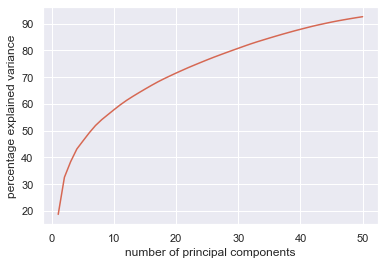

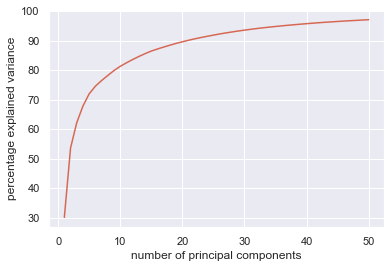

In [60]:
from morphelia.plotting import pca_variance_ratio

pca_variance_ratio(adata)
pca_variance_ratio(tr)

In [61]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=15)
sc.pp.neighbors(tr, n_neighbors=10, n_pcs=15)

In [62]:
sc.tl.umap(adata)
sc.tl.umap(tr)

C:\Users\amarx\Anaconda3\envs\morphelia_env\lib\site-packages\anndata\_core\anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'Metadata_FileLocation' as categorical
C:\Users\amarx\Anaconda3\envs\morphelia_env\lib\site-packages\anndata\_core\anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'Metadata_Row' as categorical
C:\Users\amarx\Anaconda3\envs\morphelia_env\lib\site-packages\anndata\_core\anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is depreca

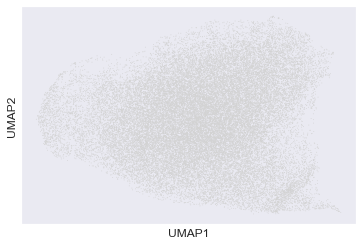

C:\Users\amarx\Anaconda3\envs\morphelia_env\lib\site-packages\anndata\_core\anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'Metadata_FileLocation' as categorical
C:\Users\amarx\Anaconda3\envs\morphelia_env\lib\site-packages\anndata\_core\anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'Metadata_Row' as categorical
C:\Users\amarx\Anaconda3\envs\morphelia_env\lib\site-packages\anndata\_core\anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is depreca

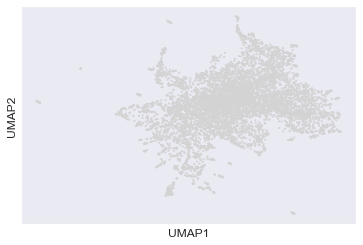

In [63]:
sc.pl.umap(adata) # , color=['agglo_1', 'agglo_2'])
sc.pl.umap(tr)

(<Figure size 1080x504 with 2 Axes>, <AxesSubplot:>)

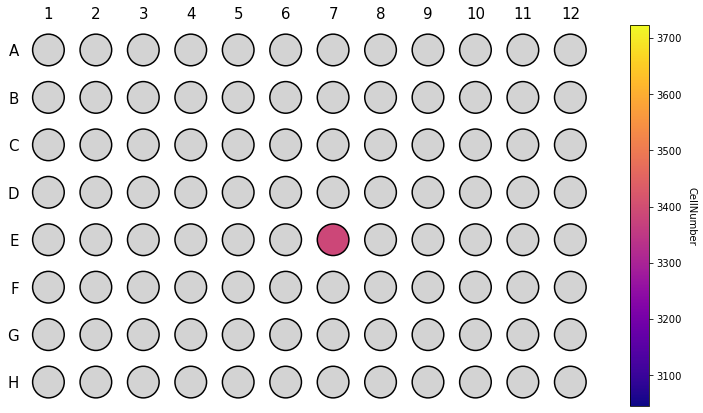

In [7]:
from morphelia.plotting import qc_plot

qc_plot(md, wells=96, select={'PlateNumber': 2}, color="CellNumber")

(<Figure size 720x576 with 2 Axes>,
 array([<AxesSubplot:xlabel='Metadata_Time', ylabel='Cells_AreaShape_Area'>,
        <AxesSubplot:xlabel='Metadata_Time', ylabel='Cells_Texture_Variance_CalceinAM_10_03_256'>],
       dtype=object))

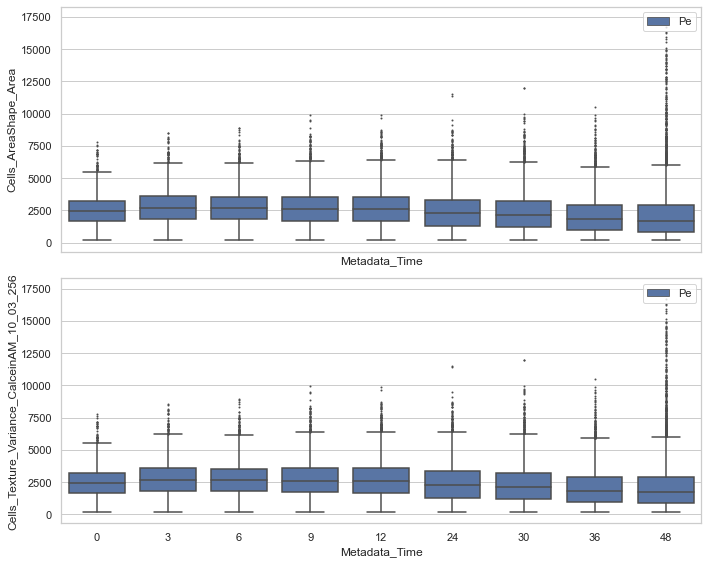

In [90]:
from morphelia.plotting import boxplot

boxplot(md, x="Metadata_Time", y=["Cells_AreaShape_Area", 'Cells_Texture_Variance_CalceinAM_10_03_256'], hue="Metadata_Treatment")

(<Figure size 720x432 with 2 Axes>,
 array([<AxesSubplot:xlabel='Metadata_Time', ylabel='Cells_AreaShape_Area'>,
        <AxesSubplot:xlabel='Metadata_Time', ylabel='Cells_Texture_Variance_CalceinAM_10_03_256'>],
       dtype=object))

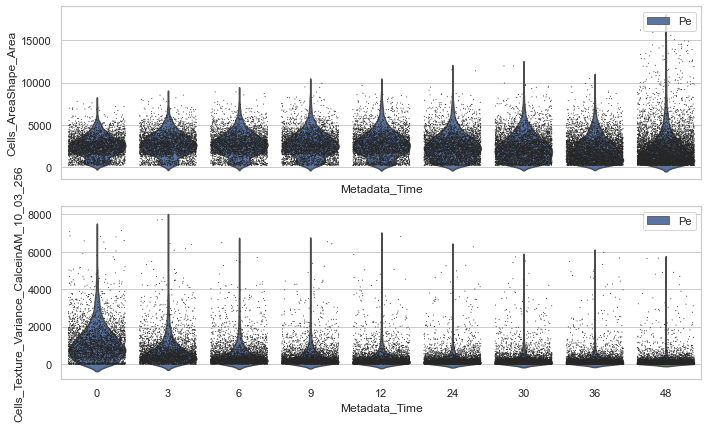

In [89]:
from morphelia.plotting import violin

violin(md, x="Metadata_Time", y=["Cells_AreaShape_Area", 'Cells_Texture_Variance_CalceinAM_10_03_256'],
       hue="Metadata_Treatment", jitter=0.4)
